In [8]:
# Data processing and visualization library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
# Tensorflow and keras library
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard
from keras.models import load_model
# ScikitLearn library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Misc
import sys
import os
import random
from unicodedata import name
from datetime import datetime

print("To ensure repeatability, use the following setup:")
print("TensorFlow version:", "2.10.0")
print("Numpy version:", '1.23.4')
print("Pandas version:", '1.5.2')
print("SKLearn version:", "1.1.3")
print("Python version:", "3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]")
print("==============================")
print("Your current library version:")
print("TensorFlow version:", tf.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("SKLearn version:", sklearn.__version__)
print("Python version:",sys.version)

To ensure repeatability, use the following setup:
TensorFlow version: 2.10.0
Numpy version: 1.23.4
Pandas version: 1.5.2
SKLearn version: 1.1.3
Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
Your current library version:
TensorFlow version: 2.10.0
Numpy version: 1.23.4
Pandas version: 1.5.2
SKLearn version: 1.1.3
Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


In [9]:
# Get the current directory
current_directory = os.getcwd()
# Construct the relative path to the CSV file
csv_filename1 = 'datasetscsv/trainval_set.csv' #Training-validation datasets
csv_filename2 = 'datasetscsv/test_set.csv' #Unseen test set
csv_filename3 = 'datasetscsv/master_dataset.csv' #Combined train-validation-test set
csv_filename4 = 'datasetscsv/allMolecule.csv' #Molecule only set
csv_path1 = os.path.join(current_directory, csv_filename1)
csv_path2 = os.path.join(current_directory, csv_filename2)
csv_path3 = os.path.join(current_directory, csv_filename3)
csv_path4 = os.path.join(current_directory, csv_filename4)
seed = 21
random.seed(seed)

In [10]:
# Importing dataset
trainval_df = pd.read_csv(csv_path1, names=["Molecule", "Formula","SMILES","Type","Cyclicity",
                                       "Primary counts","Secondary counts","Tertiary counts",
                                       "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                       "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                       "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                       "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                       "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                       "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                       "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                       "MW","Partial Pressure","Temperature",
                                       "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration", "Abbreviation"]) 
test_df     = pd.read_csv(csv_path2, names=["Molecule", "Formula","SMILES","Type","Cyclicity", 
                                       "Primary counts","Secondary counts","Tertiary counts",
                                       "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                       "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                       "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                       "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                       "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                       "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                       "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                       "MW","Partial Pressure","Temperature",
                                       "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration", "Abbreviation"]) 
# PREPROCESSING
X_test_label = test_df.drop(columns=["Absorption Capacity"])
y_test = test_df['Absorption Capacity']

X_trainval_label =  trainval_df.drop(columns=["Absorption Capacity"])
y_trainval_label = trainval_df['Absorption Capacity']

# DATA SPLITING
X_train, X_val, y_train, y_val = train_test_split(X_trainval_label, y_trainval_label, test_size=0.20, random_state=seed)

# Reserve the dataset for visualization
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()
X_reserved = pd.concat([X_train_1, X_val_1, X_test_label], axis=0)

# DROPPING STRINGS AND DATA PREPROCESSING
X_train = X_train.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])
X_test = X_test_label.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])
X_val = X_val.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])

feature_names = X_train.columns.tolist()
preprocessor = Pipeline(steps=[('step1', StandardScaler())])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_names)

X_val = pipeline.transform(X_val)
X_val = pd.DataFrame(X_val, columns=feature_names)

X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_names)

master_df = pd.read_csv(csv_path3, 
    names=["Molecule","Formula","SMILES","Type","Cyclicity",
           "Primary counts","Secondary counts","Tertiary counts",
           "Hydroxyl counts","Carboxyl counts","Oxyl counts",
           "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
           "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
           "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
           "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
           "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
           "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
           "MW","Partial Pressure","Temperature",
           "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration","Abbreviation"]) 
scaler = preprocessor.named_steps['step1']
mean_values = scaler.mean_[27] # pressure structure
std_values = scaler.scale_[27] # pressure structure

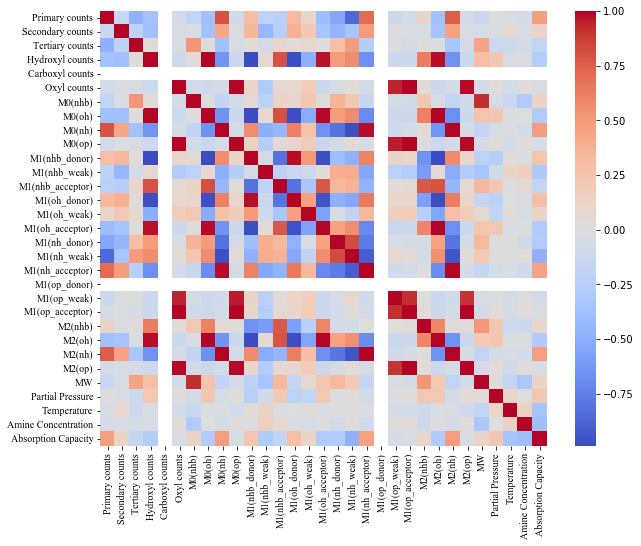

In [11]:
# Generate heatmap
numer = master_df.drop(columns = ['Rounded Concentration'])
numer = numer.select_dtypes(include='number')
plt.figure(figsize=(10, 8))  # Adjust the size as per your preference

sns.heatmap(numer.corr(), annot=False, cmap='coolwarm')

plt.xticks(fontname = 'Times New Roman', fontsize=10)
plt.yticks(fontname = 'Times New Roman', fontsize=10)

plt.show()


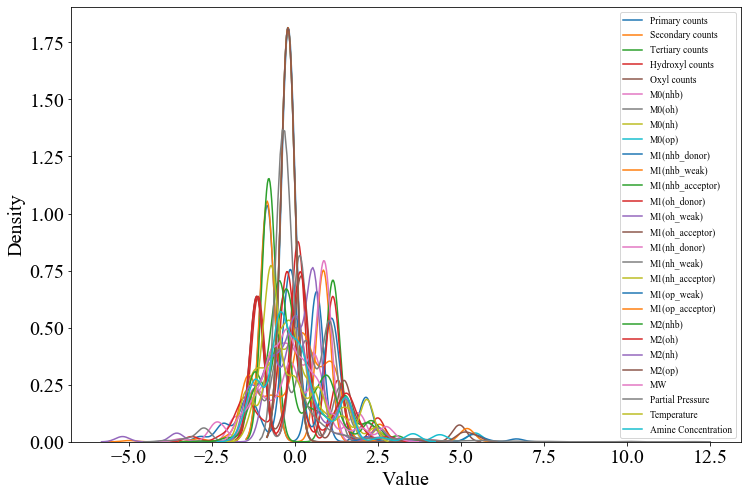

In [12]:
# Set the font for the plot
csfont = {'fontname': 'Times New Roman'}

# Select numerical columns from X_train
numerical_columns = X_train.select_dtypes(include='number')

# Create a plot with distribution curves for each feature
plt.figure(figsize=(12, 8))

for col in numerical_columns.columns:
    sns.kdeplot(numerical_columns[col], label=col, warn_singular=False)

plt.xlabel('Value', **csfont, fontsize = 20)
plt.ylabel('Density', **csfont, fontsize = 20)

# Get the legend and set font properties
legend = plt.legend(fontsize=9.5)
for text in legend.get_texts():
    text.set_fontname("Times New Roman")
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
# Show the plot
plt.show()


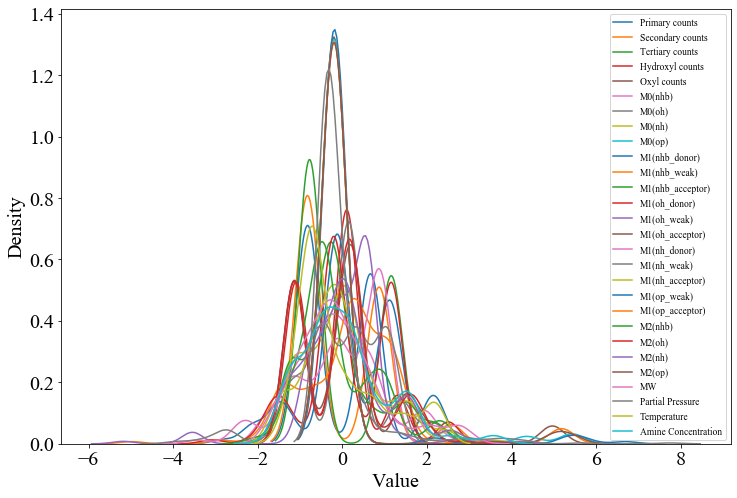

In [13]:
# Set the font for the plot
csfont = {'fontname': 'Times New Roman'}

# Select numerical columns from X_train
numerical_columns = X_val.select_dtypes(include='number')

# Create a plot with distribution curves for each feature
plt.figure(figsize=(12, 8))

for col in numerical_columns.columns:
    sns.kdeplot(numerical_columns[col], label=col, warn_singular=False)

plt.xlabel('Value', **csfont, fontsize = 20)
plt.ylabel('Density', **csfont, fontsize = 20)

# Get the legend and set font properties
legend = plt.legend(fontsize=9.5)
for text in legend.get_texts():
    text.set_fontname("Times New Roman")
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
# Show the plot
plt.show()
